In [1]:
library(knitr)
library(sqldf)
library(ggplot2)
library(mongolite)
library(ggplot2)
library(gridExtra)
library(dplyr)
library(tidyr)
library(jsonlite)
library(lubridate)
library(gridExtra)
library(GGally)
library(scales)
library(memisc)
 library(sp)
library(rgeos)
library(rgdal)
library(maptools)
library(RColorBrewer)
library(maps)
library(grid)
library(cluster)
library(StatMatch)
library(fastcluster)
library(factoextra)
library(stringr)
library(googleVis)
library(RMySQL)
library(data.table)
library(dbplyr)
library(DBI)
library(httr)
library(ldatuning)
library(udpipe)
library(egg)
library(cowplot)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa

Loading required package: lattice
Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'memisc'

The following object is masked from 'package:scales':

    percent

The following object is masked from 'package:lubridate':

    is.interval

The following objects are masked from 'package:dplyr':

    collect, recode, rename, syms

The following objec

In [14]:
plot.format <- theme(axis.text = element_text(size = 12), legend.text = element_text(size = 12), legend.title = element_text(size = 12), axis.title = element_text(size = 14), plot.title = element_text(size = 14))

ferg_cols <- read.csv("C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Topics\\corpus_text.csv", stringsAsFactors = FALSE)

In [3]:
ferg_cols_loc <- fread(file="../Preprocessing/Files/Source/ferg_cols_location.csv", sep =",", header = TRUE, 
              stringsAsFactors=FALSE,
             showProgress=getOption("datatable.showProgress", interactive()), data.table=FALSE)

In [ ]:
str(ferg_cols_loc)

In [4]:
#create_udp_model <- udpipe_download_model(language = "english", 
                                       #   model_dir = "/Project/Preprocessing/Files/Lexicon/")
create_udp_model <- udpipe_load_model("../Preprocessing/Files/Lexicon/english-ud-2.0-170801.udpipe")

docs.udp <- udpipe_annotate(create_udp_model, x = ferg_cols_loc$full_text)

In [9]:
docs.udp <- as.data.frame(docs.udp)

write.csv(docs.udp, "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Topics\\docs_udp.csv")

In [4]:
docs.udp <- read.csv("../Preprocessing/Files/Lexicon/docs_udp.csv", stringsAsFactors = FALSE)

In [4]:
head(docs.udp)

X,doc_id,paragraph_id,sentence_id,sentence,token_id,token,lemma,upos,xpos,feats,head_token_id,dep_rel,deps,misc
1,doc1,1,1,black teenage boys men children stop referring year old man killing children,1,black,black,ADJ,JJ,Degree=Pos,3,amod,NA,NA
2,doc1,1,1,black teenage boys men children stop referring year old man killing children,2,teenage,teenage,ADJ,JJ,Degree=Pos,3,amod,NA,NA
3,doc1,1,1,black teenage boys men children stop referring year old man killing children,3,boys,boy,NOUN,NNS,Number=Plur,4,compound,NA,NA
4,doc1,1,1,black teenage boys men children stop referring year old man killing children,4,men,man,NOUN,NNS,Number=Plur,6,nsubj,NA,NA
5,doc1,1,1,black teenage boys men children stop referring year old man killing children,5,children,child,NOUN,NNS,Number=Plur,4,nmod,NA,NA
6,doc1,1,1,black teenage boys men children stop referring year old man killing children,6,stop,stop,VERB,VBP,Mood=Ind|Tense=Pres|VerbForm=Fin,0,root,NA,NA


In [8]:
head(subset(docs.udp, is.na(upos)))

X,doc_id,paragraph_id,sentence_id,sentence,token_id,token,lemma,upos,xpos,feats,head_token_id,dep_rel,deps,misc


##### Get unique text

In [3]:
corpus.text.unq <- data.frame(text = trimws(corpus.text$text, "both"))

ERROR: Error in sub(re, "", x, perl = TRUE): object 'corpus.text' not found


In [20]:
corpus.text.unq$text <- as.character(corpus.text.unq)

In [ ]:
corpus.text.unq$text <- gsub("rt", "", corpus.text.unq$text)

In [ ]:
corpus.text.unq$text <- unique(corpus.text.unq$text)

In [18]:
str((corpus.text.unq))

'data.frame':	438622 obs. of  1 variable:
 $ text: chr  "black teenage boys men children stop referring year old man killing children" " please tune today killing young black male " "well go " "sick tired police killing unarmed people" ...


docs.udp.unq <- udpipe_annotate(create_udp_model, x = corpus.text.unq$text)
docs.udp.unq <- as.data.frame(docs.udp.unq)

docs.text.dtm <- cast_dtm(docs.text, "document", "term", "count", tm::weightTf)

##### Look at docs.upd

In [8]:
(docs.udp)

X,doc_id,paragraph_id,sentence_id,sentence,token_id,token,lemma,upos,xpos,feats,head_token_id,dep_rel,deps,misc
1,doc1,1,1,black teenage boys men children stop referring year old man killing children,1,black,black,ADJ,JJ,Degree=Pos,3,amod,NA,NA
2,doc1,1,1,black teenage boys men children stop referring year old man killing children,2,teenage,teenage,ADJ,JJ,Degree=Pos,3,amod,NA,NA
3,doc1,1,1,black teenage boys men children stop referring year old man killing children,3,boys,boy,NOUN,NNS,Number=Plur,4,compound,NA,NA
4,doc1,1,1,black teenage boys men children stop referring year old man killing children,4,men,man,NOUN,NNS,Number=Plur,6,nsubj,NA,NA
5,doc1,1,1,black teenage boys men children stop referring year old man killing children,5,children,child,NOUN,NNS,Number=Plur,4,nmod,NA,NA
6,doc1,1,1,black teenage boys men children stop referring year old man killing children,6,stop,stop,VERB,VBP,Mood=Ind|Tense=Pres|VerbForm=Fin,0,root,NA,NA


In [4]:
docs.udp.lem <- docs.udp %>% group_by(doc_id, paragraph_id, sentence_id) %>%
                                mutate(text = str_c(lemma, collapse = " ")) %>%
                                as.data.frame()

In [5]:
head(docs.udp.lem)

X,doc_id,paragraph_id,sentence_id,sentence,token_id,token,lemma,upos,xpos,feats,head_token_id,dep_rel,deps,misc,text
1,doc1,1,1,black teenage boys men children stop referring year old man killing children,1,black,black,ADJ,JJ,Degree=Pos,3,amod,NA,NA,black teenage boy man child stop refer year old man kill child
2,doc1,1,1,black teenage boys men children stop referring year old man killing children,2,teenage,teenage,ADJ,JJ,Degree=Pos,3,amod,NA,NA,black teenage boy man child stop refer year old man kill child
3,doc1,1,1,black teenage boys men children stop referring year old man killing children,3,boys,boy,NOUN,NNS,Number=Plur,4,compound,NA,NA,black teenage boy man child stop refer year old man kill child
4,doc1,1,1,black teenage boys men children stop referring year old man killing children,4,men,man,NOUN,NNS,Number=Plur,6,nsubj,NA,NA,black teenage boy man child stop refer year old man kill child
5,doc1,1,1,black teenage boys men children stop referring year old man killing children,5,children,child,NOUN,NNS,Number=Plur,4,nmod,NA,NA,black teenage boy man child stop refer year old man kill child
6,doc1,1,1,black teenage boys men children stop referring year old man killing children,6,stop,stop,VERB,VBP,Mood=Ind|Tense=Pres|VerbForm=Fin,0,root,NA,NA,black teenage boy man child stop refer year old man kill child


In [6]:
nrow(docs.udp.lem)

[1] 3785412

write.csv(docs.udp.lem, "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Topics\\docs_udp_lem.csv")

###### Read corpus text with lemmas

docs.udp.lem <- read.csv("C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Topics\\docs_udp_lem.csv", stringsAsFactors = FALSE)

In [7]:
docs.udp.lem <- docs.udp.lem %>% dplyr::rename("rowno" = colnames(docs.udp.lem)[1]) %>% as.data.frame()

##### Remove any remaining retweets from data frame

In [8]:
docs.udp.lem <- subset(docs.udp.lem, lemma != "rt")

In [9]:
docs.udp.lem$sentence <- gsub("rt", "", docs.udp.lem$sentence)
docs.udp.lem$text <- gsub("rt", "", docs.udp.lem$text)

terms.lem <- unique(docs.udp.lem$lemma)

##### Plot some graphs of terms and statistics of Universal POS and Language specific (English) POS

###### Get unique texts

In [10]:
docs.udp.lem.unq <- subset(docs.udp.lem, !duplicated(text))

In [11]:
NROW(docs.udp.lem.unq)

[1] 420379

In [11]:
upos_stats <- txt_freq(docs.udp.lem.unq$upos, order = TRUE)
upos_stats$key <- factor(upos_stats$key, levels = (upos_stats$key))

In [12]:
head(upos_stats)

key,freq,freq_pct
NOUN,122926,29.246021
VERB,99885,23.764207
ADJ,73815,17.561745
ADV,40244,9.574678
AUX,18642,4.435224
PRON,17841,4.244653


In [167]:
sum(subset(upos_stats, key %in% c("NOUN", "VRB", "ADJ", "AUX"))[c("freq_pct")])

[1] 51.24162

In [15]:
plot.lang <- ggplot(aes(x = key, y = freq_pct), data = upos_stats) +
    geom_bar(color = "blue", fill = "blue", stat = "identity") +
     labs(title = "POS in twitter is a good reflection of the English\n language- on average 51% compared to 47%\n (NOUN, VERB, ADJ, ADV)", x = "Universal POS", y = "Frequecncy occurence") + 
    theme(axis.text.x=element_text(angle=90)) +
    plot.format
    

In [17]:
xpos_stats_noun <- subset(docs.udp.lem.unq, xpos %in% c("NN", "NNP"))

In [196]:
head(xpos_stats_noun)

,rowno,X,doc_id,paragraph_id,sentence_id,sentence,token_id,token,lemma,upos,xpos,feats,head_token_id,dep_rel,deps,misc,text
103,103,103,doc15,1,1,hate,1,hate,hate,NOUN,NN,Number=Sing,0,root,NA,SpacesBefore=\s|SpacesAfter=\s\n,hate
131,131,131,doc20,1,1,whistle stop,1,whistle,whistle,NOUN,NN,Number=Sing,2,compound,NA,NA,whistle stop
171,171,171,doc25,1,1,jfc situation another case police officers overreacting something mild,1,jfc,jfc,NOUN,NN,Number=Sing,2,compound,NA,NA,jfc situation another case police officer overreact something mild
226,226,226,doc32,1,1,injustice,1,injustice,injustice,NOUN,NN,Number=Sing,0,root,NA,SpacesBefore=\s|SpacesAfter=\n,injustice
228,228,228,doc33,1,1,rt boy name mike brown barely hs school friend taught words,2,boy,boy,NOUN,NN,Number=Sing,3,compound,NA,NA,rt boy name mike brow barely hs school friend teach word
276,276,276,doc39,1,1,police control long fucking long getting worse,1,police,police,NOUN,NN,Number=Sing,2,compound,NA,NA,police control long fucking long get worse


In [18]:
xpos_stats_noun <- txt_freq(xpos_stats_noun$lemma, order = TRUE)
xpos_stats_noun$key <- factor(xpos_stats_noun$key, levels = (xpos_stats_noun$key))

In [198]:
head(xpos_stats_noun, 20)

key,freq,freq_pct
police,6748,7.3818822
anyone,1492,1.6321530
shit,1412,1.5446381
media,1343,1.4691565
situation,1242,1.3586689
president,1179,1.2897509
everyone,1100,1.2033299
video,1044,1.1420695
news,1002,1.0961242
mayor,996,1.0895606


In [20]:
upos_stats_noun <- subset(docs.udp.lem.unq, upos == "NOUN")

In [21]:
upos_stats_noun <- txt_freq(upos_stats_noun$lemma, order = TRUE)
upos_stats_noun$key <- factor(upos_stats_noun$key, levels = (upos_stats_noun$key))

In [22]:
plot.nouns <- ggplot(aes(x = key, y = freq_pct), data = head(subset(upos_stats_noun, 
                                                      !(key %in% c("police", "shit", "fucking"))), 30)) +
    geom_bar(color = "blue", fill = "blue", stat = "identity") +
     labs(title = "Popular NOUNS occuring in the first week\n are terms that mainly convey negative sentiment", x = "word", y = "Frequecncy occurence(%)") + 
    theme(axis.text.x=element_text(angle=90)) +
    plot.format
    

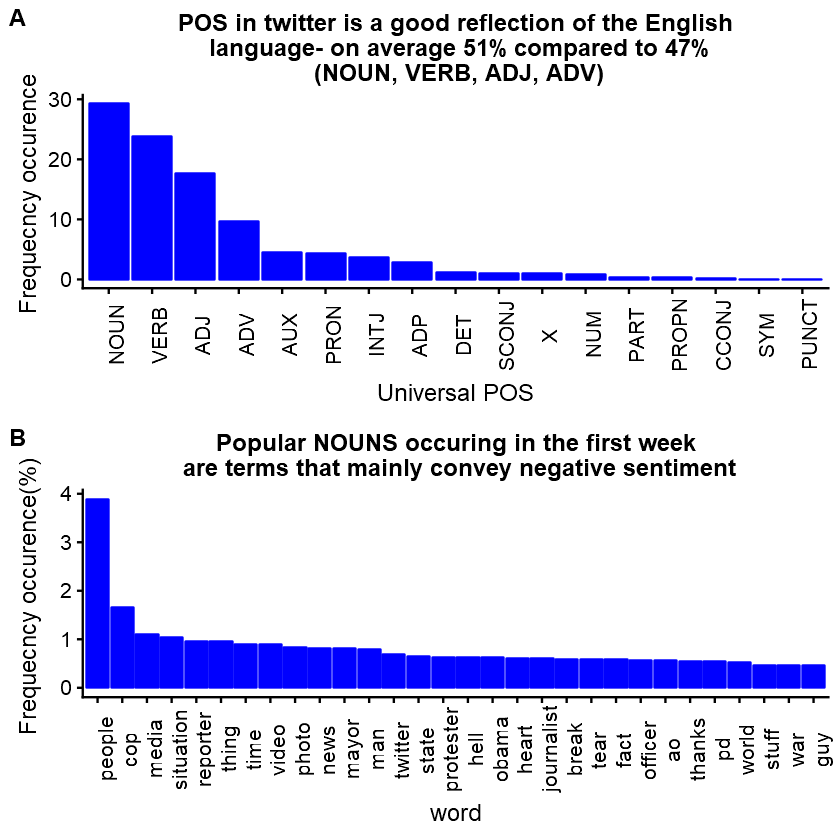

In [23]:
plot_grid(plot.lang, plot.nouns, labels = "AUTO", align = "v", axis  = "l", ncol = 1)

###### Most popular adjectives

In [25]:
upos_stats_adj <- subset(docs.udp.lem.unq, upos == "ADJ")

In [26]:
upos_stats_adj <- txt_freq(upos_stats_adj$lemma, order = TRUE)
upos_stats_adj$key <- factor(upos_stats_adj$key, levels = (upos_stats_adj$key))

In [141]:
head(upos_stats_adj, 20)

key,freq,freq_pct
live,2138,2.8928248
black,1775,2.4016670
good,1647,2.2284763
white,1346,1.8212077
many,1190,1.6101317
im,1189,1.6087786
sad,1165,1.5763054
dear,1148,1.5533035
ao,1094,1.4802387
mt,937,1.2678095


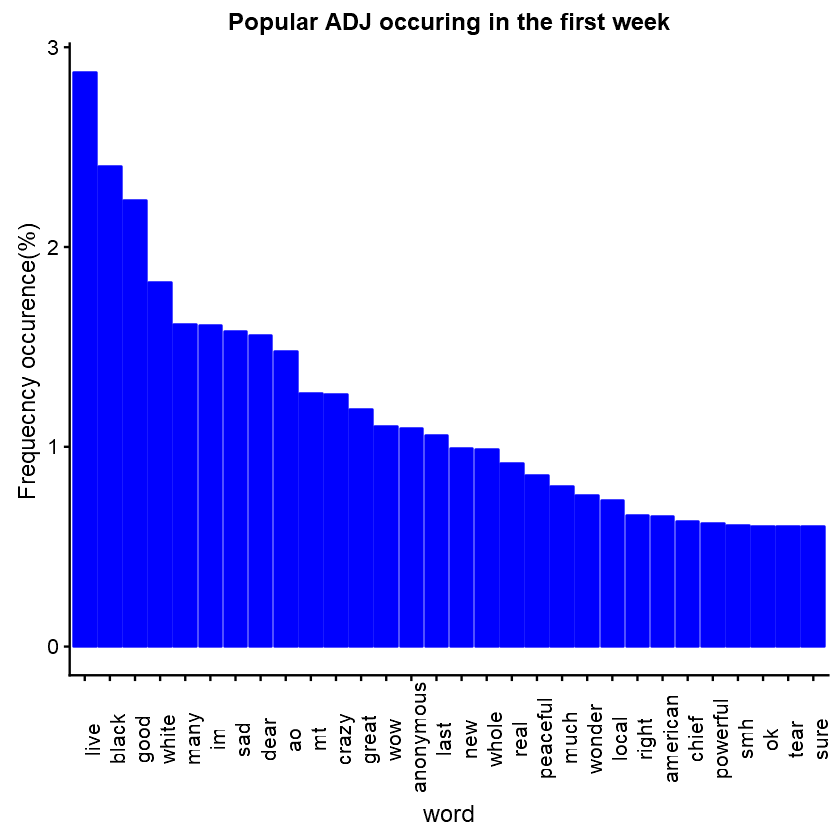

In [27]:
ggplot(aes(x = key, y = freq_pct), data = head(subset(upos_stats_adj, 
                                                      !(key %in% c("police", "shit", "fucking"))), 30)) +
    geom_bar(color = "blue", fill = "blue", stat = "identity") +
     labs(title = "Popular ADJ occuring in the first week", x = "word", y = "Frequecncy occurence(%)") + 
    theme(axis.text.x=element_text(angle=90)) +
    plot.format
    

###### Most popular verbs

In [28]:
upos_stats_verb <- subset(docs.udp.lem.unq, upos == "VERB")

In [29]:
upos_stats_verb <- txt_freq(upos_stats_verb$lemma, order = TRUE)
upos_stats_verb$key <- factor(upos_stats_verb$key, levels = (upos_stats_verb$key))

In [148]:
head(upos_stats_verb, 20)

key,freq,freq_pct
happen,3762,3.752806
watch,2748,2.741284
go,2669,2.662477
think,2468,2.461968
look,2327,2.321313
get,2163,2.157714
need,2108,2.102848
see,1996,1.991122
know,1902,1.897351
want,1623,1.619033


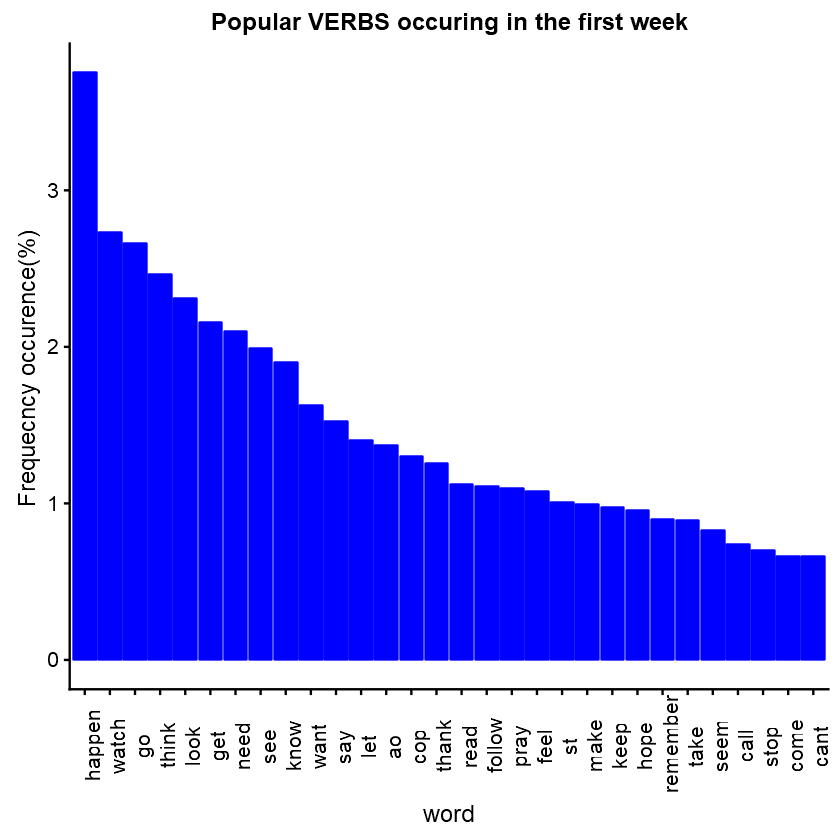

In [30]:
ggplot(aes(x = key, y = freq_pct), data = head(subset(upos_stats_verb, 
                                                      !(key %in% c("police", "shit", "fucking", "fuck"))), 30)) +
    geom_bar(color = "blue", fill = "blue", stat = "identity") +
     labs(title = "Popular VERBS occuring in the first week", x = "word", y = "Frequecncy occurence(%)") + 
    theme(axis.text.x=element_text(angle=90)) +
    plot.format
    

###### Most popular verbs

In [61]:
xpos_stats_nnp <- subset(docs.udp.lem.unq, xpos == "NNP")

In [62]:
xpos_stats_nnp <- txt_freq(xpos_stats_nnp$lemma, order = TRUE)
xpos_stats_nnp$key <- factor(xpos_stats_nnp$key, levels = (xpos_stats_nnp$key))

In [174]:
head(xpos_stats_nnp, 20)

key,freq,freq_pct
president,651,49.3181818
god,237,17.9545455
united,109,8.2575758
al,48,3.6363636
google,39,2.9545455
governor,33,2.5000000
mike,25,1.8939394
uk,18,1.3636364
wonder,15,1.1363636
sunday,13,0.9848485


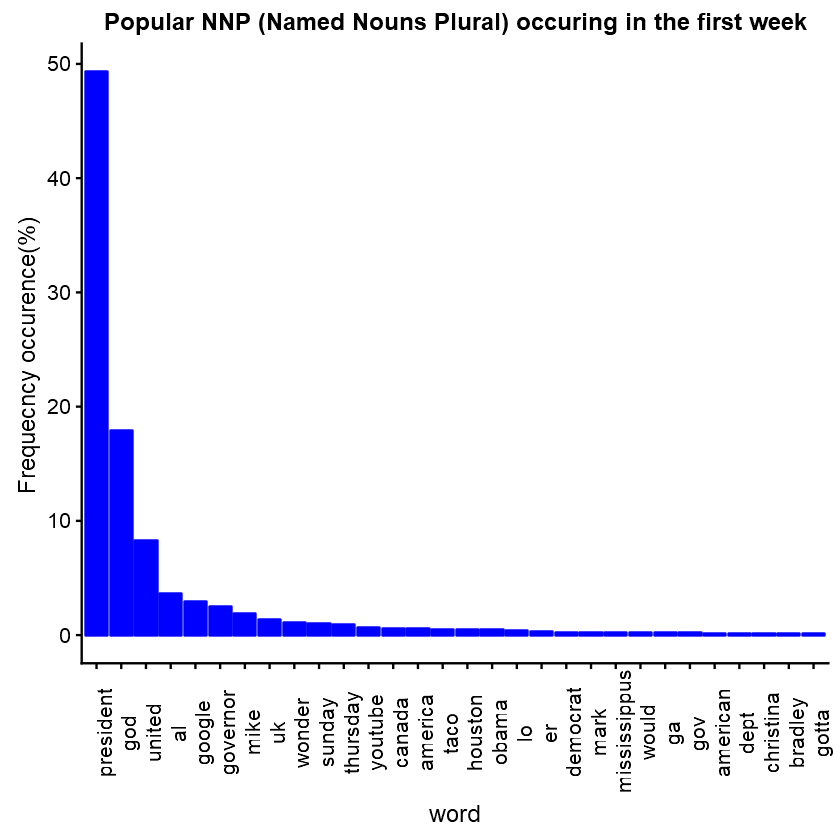

In [63]:
ggplot(aes(x = key, y = freq_pct), data = head(subset(xpos_stats_nnp, 
                                                      !(key %in% c("police", "shit", "fucking", "fuck"))), 30)) +
    geom_bar(color = "blue", fill = "blue", stat = "identity") +
     labs(title = "Popular NNP (Named Nouns Plural) occuring in the first week", x = "word", y = "Frequecncy occurence(%)") + 
    theme(axis.text.x=element_text(angle=90)) +
    plot.format
    

Frequency of of individual words by themselves did not give much context to topics/sentiment.
Some filtering via TFidf or BM25F is needed.

In [ ]:
Extract keyword bigrams and trigrams. Words occuring in the same sentence/document
vs words following each other (bigrams etc.)
Document and sentence not the same thing. Can use either or both. 
Sentence had higher rake values. Documents more interesting words.   
dplyr for POS and doc, sentence etc.

In [33]:
stats_key.ngram.rake <- keywords_rake(docs.udp.lem.unq, term = "lemma", 
                                      group =
                                      c("doc_id","sentence_id"), 
                                   relevant = 
                                      docs.udp.lem.unq$xpos %in% 
                                      c("NNP", "JJ"), n_min = 5)

#stats_key.ngram.rake$key <- factor(stats$keyword)

In [20]:
head(stats_key.ngram.rake, 20)

keyword,ngram,freq,rake
abc,1,15,0
abhorrent,1,6,0
able,1,29,0
absolute,1,51,0
absurd,1,27,0
abusive,1,7,0
ac,1,9,0
acceptable,1,16,0
accurate,1,25,0
active,1,32,0


In [34]:
upos_stats <- txt_freq(docs.udp.lem.unq$upos, order = TRUE)
upos_stats$key <- factor(upos_stats$key, levels = (upos_stats$key))

In [35]:
docs.udp <- docs.udp %>% group_by(doc_id, paragraph_id, 
                                                  sentence_id, add = FALSE) %>%
                                mutate(xpos_doc = str_c(xpos, collapse = " "),
                                      upos_doc = str_c(upos, collapse = " ")) %>%
                                as.data.frame()

In [40]:
doc.udp.upos <- keywords_collocation(docs.udp, term = "upos", group = c("doc_id", "paragraph_id", "sentence_id"),
ngram_max = 2, n_min = 2) 

In [ ]:
## Check Bigram statistics using lfmd 
## (log-frequency biased mutual dependency)

In [88]:
doc.udp.upos.pmi <- transform(doc.udp.upos, keyword = reorder(keyword, -pmi))

In [82]:
head(doc.udp.upos.pmi, 20)

keyword,ngram,left,right,freq,freq_left,freq_right,pmi,md,lfmd
PROPN PROPN,2,PROPN,PROPN,4484,17991,17129,5.783448,-3.938000,-13.659448
PUNCT INTJ,2,PUNCT,INTJ,7,30,16837,5.713136,-13.331528,-32.376192
X X,2,X,X,14944,40276,36693,5.258448,-2.726293,-10.711033
AUX PART,2,AUX,PART,44829,124391,56830,4.585276,-1.814598,-8.214472
PUNCT DET,2,PUNCT,DET,3,30,16802,4.493745,-15.773311,-36.040367
INTJ INTJ,2,INTJ,INTJ,2933,30016,16837,4.457389,-5.876469,-16.210326
PUNCT PRON,2,PUNCT,PRON,9,30,79246,3.841003,-14.841091,-33.523185
PART VERB,2,PART,VERB,44784,58035,713336,2.033857,-4.367466,-10.768789
ADP DET,2,ADP,DET,1755,107922,16802,1.873299,-9.201464,-20.276228
ADP PROPN,2,ADP,PROPN,1654,107922,17129,1.759980,-9.400296,-20.560571


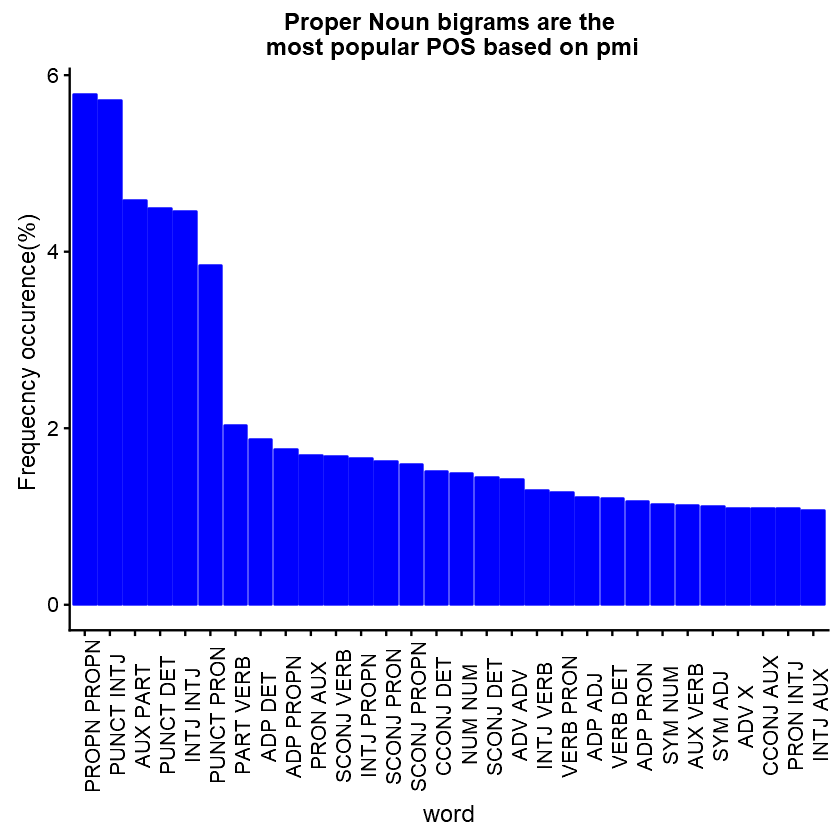

In [91]:
ggplot(aes(x = keyword, y = pmi), data = head(subset(doc.udp.upos.pmi, 
                                                      keyword != "X X"), 30)) +
    geom_bar(color = "blue", fill = "blue", stat = "identity") +
     labs(title = "Proper Noun bigrams are the\n most popular POS based on pmi", x = "word", 
          y = "Frequecncy occurence(%)") + 
    theme(axis.text.x=element_text(angle=90)) +
    plot.format

In [69]:
doc.udp.words <- keywords_collocation(docs.udp.lem, term = "lemma", group = c("doc_id"),
ngram_max = 2, n_min = 2) 

In [13]:
doc.udp.words.pmi <- doc.udp.words %>% arrange(desc(pmi))

ERROR: Error in eval(lhs, parent, parent): object 'doc.udp.words' not found


In [92]:
doc.udp.words.pmi <- transform(doc.udp.words, keyword = reorder(keyword, -pmi))

In [93]:
head(doc.udp.words.pmi, 20)

keyword,ngram,left,right,freq,freq_left,freq_right,pmi,md,lfmd
debo adegbile,2,debo,adegbile,3,3,3,20.2047,0,-20.2047
antipoorleadership antiasshole,2,antipoorleadership,antiasshole,3,3,3,20.2047,0,-20.2047
kum bah,2,kum,bah,3,3,3,20.2047,0,-20.2047
zac champommier,2,zac,champommier,3,3,3,20.2047,0,-20.2047
boicott citgo,2,boicott,citgo,3,3,3,20.2047,0,-20.2047
raison detre,2,raison,detre,3,3,3,20.2047,0,-20.2047
barackus ebolus,2,barackus,ebolus,3,3,3,20.2047,0,-20.2047
dora explorer,2,dora,explorer,3,3,3,20.2047,0,-20.2047
mildred gaddi,2,mildred,gaddi,3,3,3,20.2047,0,-20.2047
zipsgirl henribakn,2,zipsgirl,henribakn,3,3,3,20.2047,0,-20.2047


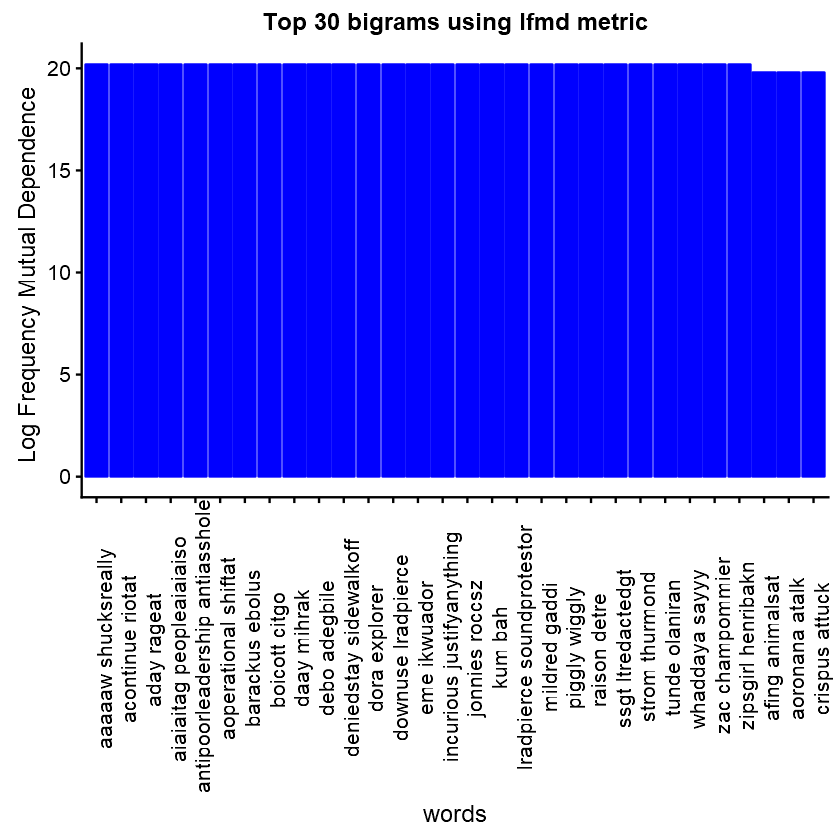

In [94]:
ggplot(aes(x = keyword, y = pmi), 
       data = head(doc.udp.words.pmi, 30)) + #top_n(doc.udp.words, 20, lfmd)) +
    geom_bar(color = "blue", fill = "blue", stat = "identity") +
     labs(title = "Top 30 bigrams using lfmd metric", x = "words", 
          y = "Log Frequency Mutual Dependence") + 
    theme(axis.text.x=element_text(angle=90)) +
    plot.format

Based on the results above the corpus needs further processing to remove non-english and/or non-sensical terms

In [18]:
docs.udp.lem.unq2 <- subset(docs.udp.lem, !duplicated(text))

Reduce the vocab. Why? Terms such as missouri occur often and hence need to be removed based on tfidf or Okapi BM25

#### Reduce the Vocabulary

In [ ]:
### Text with numbers, punctuation, stopwords removed

In [95]:
corpus.text <- read.csv("../Preprocessing/Files/Lexicon/corpus_text.csv", stringsAsFactors = FALSE)

In [96]:
corpus.text$X = NULL
colnames(corpus.text) <- "text"

In [52]:
NROW(corpus.text)

[1] 438622

In [97]:
corpus.text.unq <- corpus.text %>% group_by(text) %>% 
                                            dplyr::summarise(n = n ()) %>%
                                    filter(!(text == "" | text == " ")) %>%
                                    dplyr::select(-n) %>%
                                    as.data.frame()

In [98]:
head(corpus.text.unq)

text
aa bo conners
aa men unarmed unarmed shouldve quicker kill james eagan holmes butno
aa police white voters havent demanded representation shit
aaa number police department youre welcome
aaaaaaaaaaaaaaaaaaaaaaaaand thatll pretty much end night right good luck see morning
aaaah see really tho leadership tea party state rights peeps feds scared


In [99]:
corpus.text.unq$text <- as.character(corpus.text.unq$text)

In [100]:
corpus.text.unq$text <- gsub("rt", "", corpus.text.unq$text)

In [101]:
corpus.text.unq <- data.frame(text = trimws(corpus.text.unq$text, "both"))

In [ ]:
### Placeholder to annotate the corpus based on unique text

docs.udp.unq <- udpipe_annotate(create_udp_model, x = corpus.text.unq$text)

docs.udp.unq <- as.data.frame(docs.udp.unq)

write.csv(docs.udp.unq, "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Topics\\docs_udp_unq.csv")

In [102]:
docs.udp.unq <- read.csv("../Preprocessing/Files/Lexicon/docs_udp_unq.csv", stringsAsFactors = FALSE)

In [103]:
docs.udp.unq <- docs.udp.unq %>% dplyr::rename("rowno" = colnames(docs.udp.unq)[1]) %>% as.data.frame()

In [104]:
docs.udp.lem <- docs.udp.unq %>% group_by(doc_id, paragraph_id, sentence_id) %>%
                                mutate(text = str_c(lemma, collapse = " ")) %>%
                                as.data.frame()

In [105]:
docs.udp.lem <- docs.udp.lem %>% group_by(doc_id, paragraph_id, 
                                                  sentence_id, add = FALSE) %>%
                                mutate(xpos_doc = str_c(xpos, collapse = " "),
                                      upos_doc = str_c(upos, collapse = " ")) %>%
                                as.data.frame()

In [15]:
head(docs.udp.lem.unq)

rowno,rowno,doc_id,paragraph_id,sentence_id,sentence,token_id,token,lemma,upos,xpos,feats,head_token_id,dep_rel,deps,misc,text,xpos_doc,upos_doc
1,1,doc1,1,1,aa bo conners,1,aa,aa,DET,DT,NA,3,det,NA,NA,aa bo conner,DT NN NNS,DET NOUN NOUN
2,2,doc1,1,1,aa bo conners,2,bo,bo,NOUN,NN,Number=Sing,3,compound,NA,NA,aa bo conner,DT NN NNS,DET NOUN NOUN
3,3,doc1,1,1,aa bo conners,3,conners,conner,NOUN,NNS,Number=Plur,0,root,NA,SpacesAfter=\n,aa bo conner,DT NN NNS,DET NOUN NOUN
4,4,doc2,1,1,aa men unarmed unarmed shouldve quicker kill james eagan holmes butno,1,aa,aa,DET,DT,NA,2,det,NA,NA,aa man unarmed unarmed shouldve quicker kill james eagan holme but no,DT NNS JJ JJ NN RBR VB NNS JJ NNS CC DT,DET NOUN ADJ ADJ NOUN ADV VERB NOUN ADJ NOUN CCONJ DET
5,5,doc2,1,1,aa men unarmed unarmed shouldve quicker kill james eagan holmes butno,2,men,man,NOUN,NNS,Number=Plur,7,nsubj,NA,NA,aa man unarmed unarmed shouldve quicker kill james eagan holme but no,DT NNS JJ JJ NN RBR VB NNS JJ NNS CC DT,DET NOUN ADJ ADJ NOUN ADV VERB NOUN ADJ NOUN CCONJ DET
6,6,doc2,1,1,aa men unarmed unarmed shouldve quicker kill james eagan holmes butno,3,unarmed,unarmed,ADJ,JJ,Degree=Pos,5,amod,NA,NA,aa man unarmed unarmed shouldve quicker kill james eagan holme but no,DT NNS JJ JJ NN RBR VB NNS JJ NNS CC DT,DET NOUN ADJ ADJ NOUN ADV VERB NOUN ADJ NOUN CCONJ DET


write.csv(docs.udp.lem.unq, "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Topics\\docs_udp_lem_unq.csv")

#### Get statistics on terms or vocabulary

In [ ]:
##### Use bigrams and trigrams

In [ ]:
### Placeholder to load docs_udp_lem_unq.csv file - gets the bigrams and trigrams in each 
### tweet

docs.udp.lem.unq <- read.csv("../Preprocessing/Files/Lexicon/docs_udp_lem_unq.csv", stringsAsFactors = FALSE)

docs.udp.lem.unq <- docs.udp.lem.unq %>% dplyr::select(-X) %>% as.data.frame()

In [111]:
docs.udp.lem.unq <- docs.udp.lem.unq  %>% 
                            group_by(doc_id, sentence_id) %>%
                            mutate(lemma_bigram = txt_nextgram(lemma, n = 2),
                                  lemma_trigram = txt_nextgram(lemma, n = 3)) %>%
                            as.data.frame()


In [112]:
docs.lem.freq <- document_term_frequencies(docs.udp.lem.unq, 
                                          document = "doc_id", 
                                           term = "lemma")                 

In [113]:
docs.lem.freq.stats <- 
document_term_frequencies_statistics(docs.lem.freq, k= 1.2, b=0.75)

In [114]:
summary(docs.lem.freq.stats)

    doc_id              term                freq              tf         
 Length:3474412     Length:3474412     Min.   : 1.000   Min.   :0.03704  
 Class :character   Class :character   1st Qu.: 1.000   1st Qu.:0.08333  
 Mode  :character   Mode  :character   Median : 1.000   Median :0.10000  
                                       Mean   : 1.025   Mean   :0.12246  
                                       3rd Qu.: 1.000   3rd Qu.:0.14286  
                                       Max.   :20.000   Max.   :1.00000  
      idf             tf_idf            tf_bm25            bm25        
 Min.   : 1.637   Min.   : 0.07441   Min.   :0.5236   Min.   : 0.9828  
 1st Qu.: 3.915   1st Qu.: 0.38384   1st Qu.:0.8495   1st Qu.: 3.6204  
 Median : 4.973   Median : 0.54463   Median :0.9264   Median : 4.7886  
 Mean   : 5.449   Mean   : 0.66699   Mean   :0.9694   Mean   : 5.2758  
 3rd Qu.: 6.551   3rd Qu.: 0.79504   3rd Qu.:1.0720   3rd Qu.: 6.4113  
 Max.   :12.961   Max.   :12.96096   Max.   :1.923

In [ ]:
#### police has tf = 0.05, tf_idf = 0.12, tf_bm25 = 0.8, bm25 = 1.3 (> min)

In [118]:
docs.lem.freq.vocab <- docs.lem.freq.stats %>% 
                        group_by(term) %>%
                        summarise(corpus.freq = n(),
                                 tf_idf = mean(tf_idf),
                                 bm25 = mean(bm25)) %>%
                        as.data.frame()

In [ ]:
#### Remove the bottom 10% and top 1% of terms

In [119]:
docs.lem.freq.vocab.rd <- subset(docs.lem.freq.vocab, tf_idf > quantile(tf_idf,0.1) & tf_idf < quantile(tf_idf,0.99))

In [ ]:
#### Create unique row id for each document

In [120]:
docs.lem.freq$rowno <- rownames(docs.lem.freq)

In [121]:
docs.lem.freq.vocab.rd$rowno <- rownames(docs.lem.freq.vocab.rd)

In [122]:
docs.lem.freq.vocab.rd <- docs.lem.freq %>% 
                        inner_join(docs.lem.freq.vocab.rd[c("term", 
                                                            "corpus.freq")], 
                                              by = "term") %>%
                as.data.frame()

In [168]:
head(docs.lem.freq.vocab.rd)

doc_id,term,freq,tf,idf,tf_idf,tf_bm25,bm25,corpus.freq
doc1,bo,1,0.33333333,9.247392,3.0824639,1.3559921,12.539390,41
doc1,conner,1,0.33333333,9.176774,3.0589247,1.3559921,12.443633,44
doc2,shouldve,1,0.08333333,8.093429,0.6744524,0.8495148,6.875488,130
doc2,quicker,1,0.08333333,9.628759,0.8023966,0.8495148,8.179774,28
doc2,james,1,0.08333333,11.169204,0.9307670,0.8495148,9.488405,6
doc2,eagan,1,0.08333333,12.267817,1.0223181,0.8495148,10.421692,2


saveRDS(docs.lem.freq.vocab.rd, file = "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Topics\\docs_lem_freq_vocab_rd.rds")

In [ ]:
### Coocccurence of words that occur in same document

In [123]:
docs.vocab.rd <- cooccurrence(docs.lem.freq.vocab.rd[ , c("doc_id", "term", "freq")], 
                                order = TRUE, group = "doc_id", term = "term")

In [124]:
docs.vocab.rd <- docs.vocab.rd %>%
                    mutate(terms1_2 = str_c(term1, term2, sep = " ")) %>%
                as.data.frame()

In [21]:
head(docs.vocab.rd)

term1,term2,cooc,terms1_2
howard,university,508,howard university
howard,powerful,230,howard powerful
powerful,university,209,powerful university
bell,taco,183,bell taco
alex,jone,167,alex jone
aile,roger,115,aile roger


In [125]:
docs.vocab.rd <- transform(docs.vocab.rd, terms1_2 = reorder(terms1_2, -cooc))

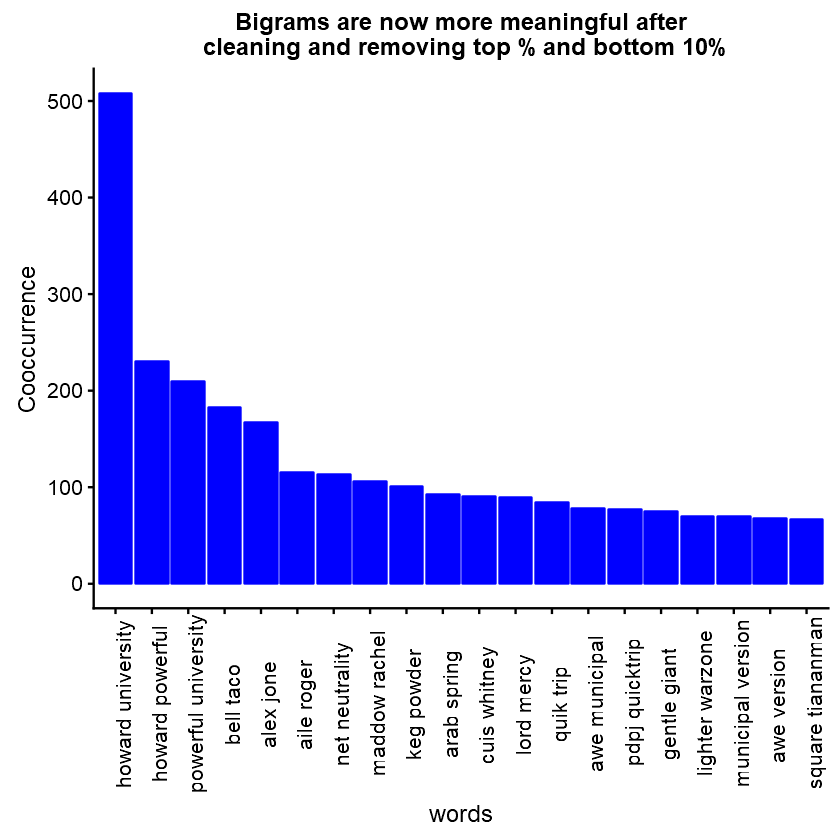

In [130]:
ggplot(aes(x = terms1_2, y = cooc), 
       data = top_n(docs.vocab.rd, 20, cooc)) +
    geom_bar(color = "blue", fill = "blue", stat = "identity") +
     labs(title = "Bigrams are now more meaningful after\n cleaning and removing top % and bottom 10%", x = "words", 
          y = "Cooccurrence") + 
    theme(axis.text.x=element_text(angle=90)) +
    plot.format

After cleaning the corpus based on tf_idf more meaningful 
terms are more visible/popular.